# Load Modules

In [41]:
from pathlib import Path
import json
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score

#Link type map
from tld.linktypes import fine_linktype_map

# Load Data

In [59]:
results_dir = Path.cwd() / 'data' / 'results' / 'bert-detailed-results'
# results_dir = Path.cwd() / 'data' / 'results' / 'distillbert-detailed-results'

class_rep_d = {}
conf_mat_d = {}
REPOS = []

for run_dir in results_dir.iterdir():
    run_name = run_dir.name
    if 'linktype' in (run_name.split('_')) and 'plus' in (run_name.split('_')):
        repo = run_name.split('_')[0]
        REPOS.append(repo)
        
        print(repo)
        
        with (run_dir / 'run_config.json').open('r', encoding='utf8') as f:
            run_config = json.load(f)
        test_output = np.load(run_dir / 'test_output.npz')
        
        class_rep = classification_report(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            target_names=run_config['label_names'],
            output_dict = True
        )
        
        class_rep_df = pd.DataFrame(class_rep).transpose()
        
        class_rep_df.to_csv('data/results/distillbert-results/class_rep_LT_'+repo+'_plus_DistillBERT.csv')
        
        class_rep_d[repo] = class_rep_df
        
        conf_mat = confusion_matrix(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            normalize='true'
        )
        conf_mat = np.round(conf_mat, 2)
    
        conf_mat_df = pd.DataFrame(conf_mat, columns=run_config['label_names'], index=run_config['label_names']).transpose()
        conf_mat_d[repo] = conf_mat_df
        
        

secondlife
jira
jiraecosystem
hyperledger
inteldaos
sakai
mariadb
apache


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mongodb
jfrog
sonatype
mojang
redhat


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


spring
qt


In [60]:
#Sort Repos alphabetically
REPOS.sort()
REPOS

['apache',
 'hyperledger',
 'inteldaos',
 'jfrog',
 'jira',
 'jiraecosystem',
 'mariadb',
 'mojang',
 'mongodb',
 'qt',
 'redhat',
 'sakai',
 'secondlife',
 'sonatype',
 'spring']

In [61]:
# For better Figures
repo_dict = {'apache':'Apache',
 'hyperledger':'Hyperledger',
 'inteldaos':'IntelDAOS',
 'jfrog':'JFrog',
 'jira':'Jira',
 'jiraecosystem':'JiraEcosystem',
 'mariadb':'MariaDB',
 'mojang':'Mojang',
 'mongodb':'MongoDB',
 'qt':'Qt',
 'redhat':'RedHat',
 'sakai':'Sakai',
 'secondlife':'SecondLife',
 'sonatype':'Sonatype',
 'spring':'Spring'}

In [62]:
for s in REPOS:
    beta = np.round(class_rep_d[s]['support'].loc['macro avg']/class_rep_d[s]['support'],0)**2
    pre = class_rep_d[s]['precision']
    rec = class_rep_d[s]['recall']
    class_rep_d[s]['fbeta-score'] = (1+beta)*(pre*rec)/((beta*pre)+rec)
    class_rep_d[s]['fbeta-score'].fillna(0, inplace=True)

In [63]:
for s in REPOS:
    print(class_rep_d[s])

              precision    recall  f1-score       support  fbeta-score
Subtask        0.891317  0.929880  0.910190  16757.000000     0.925874
Relate         0.595346  0.700187  0.643524  14469.000000     0.693008
Duplicate      0.544489  0.444937  0.489705   5185.000000     0.445744
Block          0.595163  0.462261  0.520360   2875.000000     0.462579
Epic           0.958952  0.980808  0.969757   2501.000000     0.980757
Depend         0.514847  0.409200  0.455984   2500.000000     0.409390
Non-Link       0.766171  0.753978  0.760026   2325.000000     0.754001
Incorporate    0.595398  0.508385  0.548462   2087.000000     0.508504
Breaks         0.405817  0.336782  0.368090    870.000000     0.336798
Clone          0.667579  0.564815  0.611912    864.000000     0.564838
Require        0.473230  0.378453  0.420568    724.000000     0.378468
Supercede      0.375635  0.227692  0.283525    650.000000     0.227706
Cause          0.423445  0.285024  0.340712    621.000000     0.285037
accura

## Figure 2: Confusion Matrix 

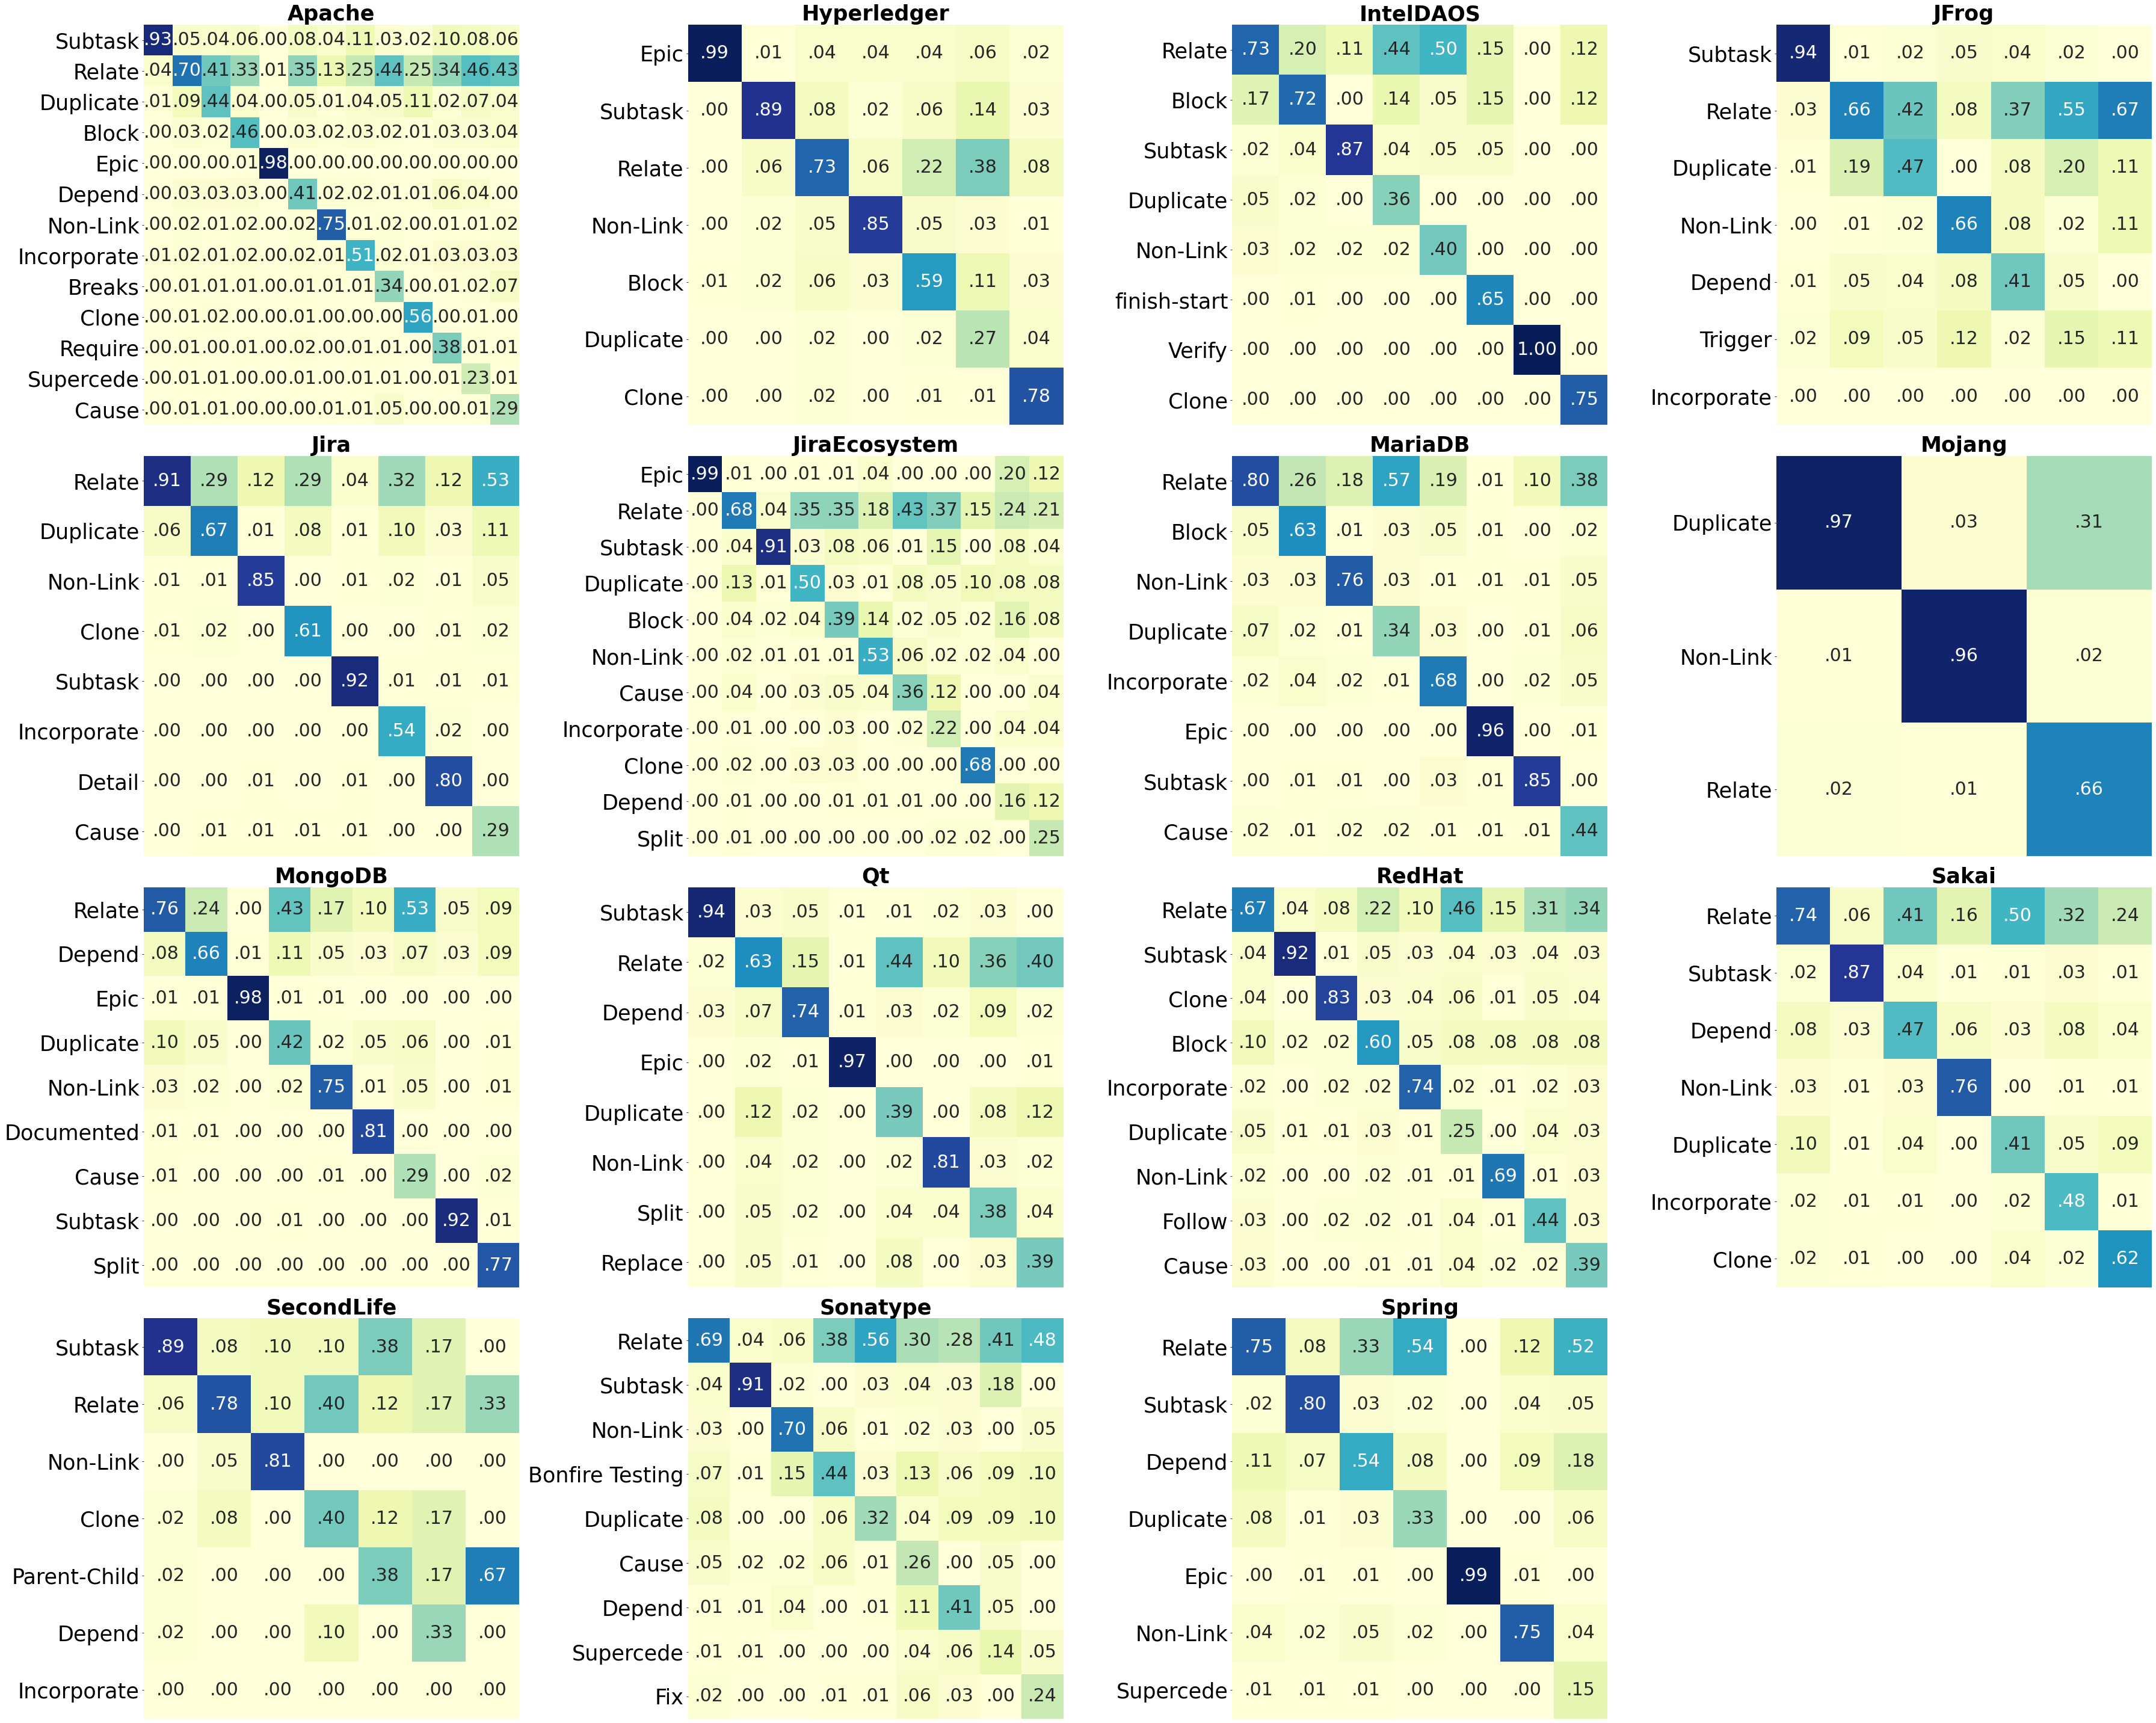

In [13]:
# Plot confusion matrices into one plot and save the figure
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(50, 40))
plt.rc('font', size=14) 

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

for s, ax in zip(REPOS, axes.flat):
    confmat_df = conf_mat_d[s]
    
    sns.heatmap(confmat_df, ax=ax, cmap="YlGnBu", vmin = 0, vmax = 1, 
                annot=True, cbar = False, xticklabels=False, annot_kws={'size':30}, fmt='.2f')
    ax.set_title(repo_dict[s], size=35, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 35)
    for text in ax.texts:
        temp = text.get_text()
        temp = temp.replace("0.", ".")
        text.set_text(temp)
    
fig.delaxes(axes[3, 3])
plt.tight_layout()
fig.savefig('pics/confmats.png')

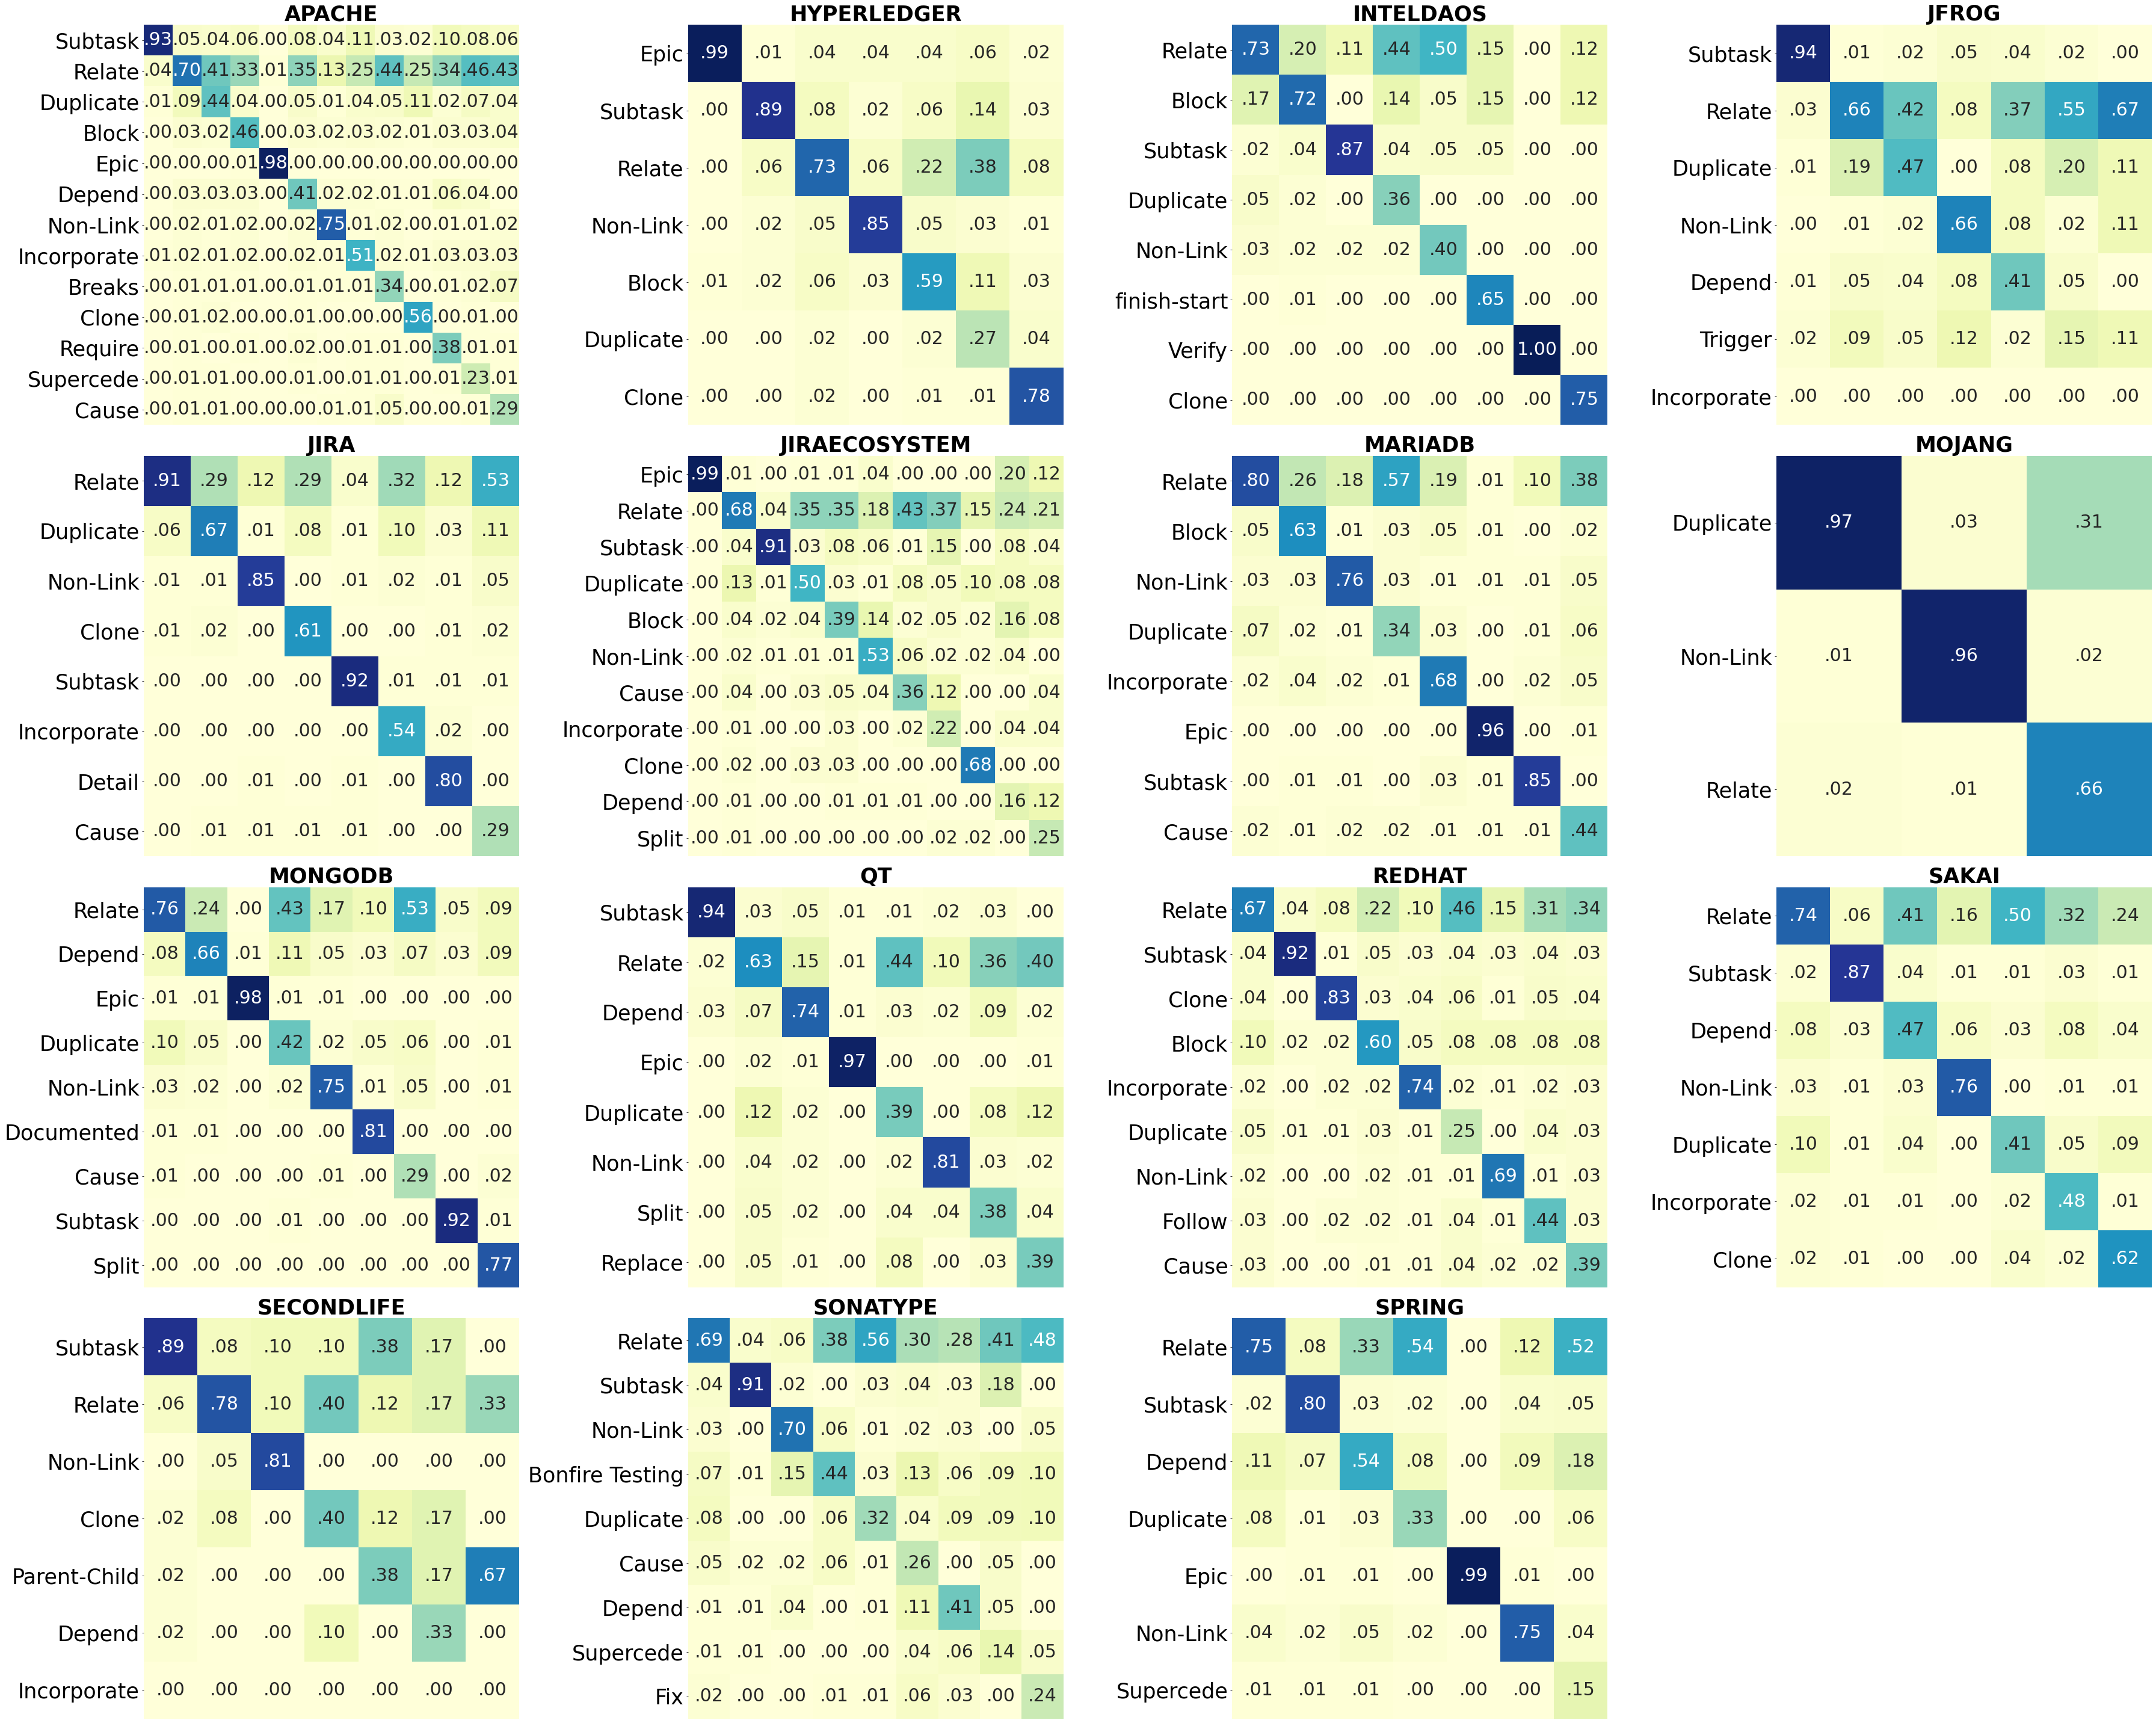

In [14]:
# Plot confusion matrices into one plot and save the figure
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(50, 40))
plt.rc('font', size=14) 

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

for s, ax in zip(REPOS, axes.flat):
    confmat_df = conf_mat_d[s]
    
    sns.heatmap(confmat_df, ax=ax, cmap="YlGnBu", vmin = 0, vmax = 1, 
                annot=True, cbar = False, xticklabels=False, annot_kws={'size':30}, fmt='.2f')
    ax.set_title(s.upper(), size=35, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 35)
    for text in ax.texts:
        temp = text.get_text()
        temp = temp.replace("0.", ".")
        text.set_text(temp)
    
fig.delaxes(axes[3, 3])
plt.tight_layout()
fig.savefig('pics/confmats.png')

## Table 4: Correlations of Section "Analysis of Differences"

In [15]:
# Different Types of Users in an issue tracker
user_numbers = pd.read_csv('data/user_numbers.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
user_numbers

,TotalUsers,Creators,Reporters,Assignees,LinkSetters
Apache,115394,112718,113477,17513,11020
Hyperledger,1805,1638,1643,913,329
IntelDAOS,85,77,77,76,51
JFrog,2713,2677,2664,182,303
Jira,50930,41325,50203,2143,6300
JiraEcosystem,4166,3918,4006,786,760
MariaDB,4229,4216,4220,133,490
Mindville,623,359,617,18,16
Mojang,242589,242506,242240,79,339
MongoDB,7777,7655,7680,646,929


In [16]:
creation_year = [2000, 2016, 2016, 2006, 2002, 2004, 2009, 2015, 2012, 2009, 2005, 2001, 2004, 2007, 2008, 2003]
ages = np.repeat(2022, 16) - creation_year
user_numbers['ages'] = ages
user_numbers

,TotalUsers,Creators,Reporters,Assignees,LinkSetters,ages
Apache,115394,112718,113477,17513,11020,22
Hyperledger,1805,1638,1643,913,329,6
IntelDAOS,85,77,77,76,51,6
JFrog,2713,2677,2664,182,303,16
Jira,50930,41325,50203,2143,6300,20
JiraEcosystem,4166,3918,4006,786,760,18
MariaDB,4229,4216,4220,133,490,13
Mindville,623,359,617,18,16,7
Mojang,242589,242506,242240,79,339,10
MongoDB,7777,7655,7680,646,929,13


In [17]:
#Drop Mindville from frame
user_numbers.drop(index = ['Mindville'], inplace = True)

In [18]:
user_num = user_numbers.transpose()
user_num

,Apache,Hyperledger,IntelDAOS,JFrog,Jira,JiraEcosystem,MariaDB,Mojang,MongoDB,Qt,RedHat,Sakai,SecondLife,Sonatype,Spring
TotalUsers,115394,1805,85,2713,50930,4166,4229,242589,7777,21386,17698,1584,341,45651,15222
Creators,112718,1638,77,2677,41325,3918,4216,242506,7655,21189,17288,1441,332,45595,15188
Reporters,113477,1643,77,2664,50203,4006,4220,242240,7680,21173,17365,1462,327,45626,15189
Assignees,17513,913,76,182,2143,786,133,79,646,1347,2616,696,95,90,260
LinkSetters,11020,329,51,303,6300,760,490,339,929,614,2685,378,194,1004,121
ages,22,6,6,16,20,18,13,10,13,17,21,18,15,14,19


In [19]:
repo_overview = pd.read_csv('data/repo_overview.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
repo_overview.drop(index = ['Mindville'], inplace = True)
repo_overview = repo_overview.transpose()
repo_overview

Source,Apache,Hyperledger,IntelDAOS,JFrog,Jira,JiraEcosystem,MariaDB,Mojang,MongoDB,Qt,RedHat,Sakai,SecondLife,Sonatype,Spring
#Issues,1014926.000,28146.000,9474.000,15535.000,274545.000,41866.00,31229.000,420819.000,137172.000,148579.000,353000.000,50550.000,1867.000,87284.00,69156.000
#Links,255767.000,16304.000,2599.000,3229.000,99819.000,11398.00,14618.000,215527.000,63821.000,40105.000,119669.000,19803.000,631.000,4465.00,14462.000
#Linktypes,16.000,8.000,11.000,10.000,16.000,14.00,8.000,5.000,14.000,11.000,15.000,8.000,6.000,11.00,7.000
#Projects,646.000,32.000,2.000,10.000,30.000,101.00,11.000,8.000,27.000,21.000,241.000,53.000,2.000,5.00,80.000
%IssuesWithLinks,0.285,0.549,0.308,0.286,0.467,0.33,0.445,0.537,0.452,0.302,0.392,0.424,0.399,0.07,0.256
%CrossProject,5.230,4.620,3.270,8.240,43.420,6.77,2.540,5.430,19.090,6.920,23.540,1.370,2.380,1.50,9.960


In [20]:
#Get different properties of repositories
repos = []
means = []
w_means = []
precs = []
w_precs = []
recs = []
w_recs = []
stds = []
accs = []

num_issues = list(repo_overview.loc['#Issues'])
num_links = list(repo_overview.loc['#Links'])
num_subproj = list(repo_overview.loc['#Projects'])
num_linktypes = list(repo_overview.loc['#Linktypes'])
num_coverage = list(repo_overview.loc['%IssuesWithLinks'])
num_crossproject = list(repo_overview.loc['%CrossProject'])
num_predlts = []

num_assignees = list(user_num.loc['Assignees'])
num_creators = list(user_num.loc['Creators'])
num_reporter = list(user_num.loc['Reporters'])
num_link_setters = list(user_num.loc['LinkSetters'])
num_totalusers = list(user_num.loc['TotalUsers'])
age = list(user_num.loc['ages'])
#  
#        
for s in REPOS:
    class_rep_df = class_rep_d[s]
    repos.append(s)
    means.append(class_rep_df['f1-score'].loc['macro avg'])
    w_means.append(class_rep_df['f1-score'].loc['weighted avg'])
    precs.append(class_rep_df['precision'].loc['macro avg'])
    w_precs.append(class_rep_df['precision'].loc['weighted avg'])
    recs.append(class_rep_df['recall'].loc['macro avg'])
    w_recs.append(class_rep_df['recall'].loc['weighted avg'])
    accs.append(class_rep_df['f1-score'].loc['accuracy'])
    stds.append(class_rep_df['f1-score'].iloc[:-3].std())
    
    filename = 'data/processed/links_'+s+'.csv'
    links = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col = 0, sep=";")
    
    links['mappedtype'] = links['linktype'].map(fine_linktype_map)
    linktypes = (links.mappedtype.value_counts()>=len(links)*0.01).rename_axis('mappedtype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['mappedtype'])

    num_predlts.append(len(valid_types))

stat_dict = {
            'repos': repos,
            'means': means,
            'w_means': w_means,
            'precs': precs,
            'w_precs': w_precs,
            'recs': recs,
            'w_recs': w_recs,
            'stds' : stds,
            'accs': accs,
            'num_issues': num_issues,
            'num_links' : num_links,
            'num_subproj': num_subproj,
            'norm_subproj': np.array(num_subproj)/np.linalg.norm(np.array(num_subproj)),
            'num_linktypes': num_linktypes,
            'num_predlts': num_predlts,
            'num_coverage': num_coverage,
            'num_crossproject': num_crossproject,
            'num_assignees': num_assignees,
            'num_creators': num_creators,
            'num_reporter': num_reporter,
            'num_totalusers': num_totalusers,
            'num_linksetters':num_link_setters,
            'age': age
          }

#Put all numbers into a dataframe for further analysis
stat_df = pd.DataFrame(stat_dict)

In [21]:
#Calculate some user ratios
stat_df['assignne_proj_ratio'] = stat_df['num_assignees']/stat_df['num_subproj']
stat_df['assignee_user_ratio'] = stat_df['num_assignees']/stat_df['num_totalusers']
stat_df['issue_user_ratio'] = stat_df['num_issues']/stat_df['num_totalusers']
stat_df['issue_assigne_ratio'] = stat_df['num_issues']/stat_df['num_assignees']
stat_df['proj_age_ratio'] = stat_df['num_subproj']/stat_df['age']
stat_df['issue_age_ratio'] = stat_df['num_issues']/stat_df['age']
stat_df['links_age_ratio'] = stat_df['num_links']/stat_df['age']

In [22]:
stat_df.sort_values(by='repos')

,repos,means,w_means,precs,w_precs,recs,w_recs,stds,accs,num_issues,...,num_totalusers,num_linksetters,age,assignne_proj_ratio,assignee_user_ratio,issue_user_ratio,issue_assigne_ratio,proj_age_ratio,issue_age_ratio,links_age_ratio
0,apache,0.563294,0.698571,0.600568,0.697587,0.537108,0.706092,0.211805,0.706092,1014926.0,...,115394,11020,22,27.109907,0.151767,8.795310,57.952721,29.363636,46133.000000,11625.772727
1,hyperledger,0.743591,0.845027,0.772558,0.844455,0.730034,0.849945,0.202239,0.849945,28146.0,...,1805,329,6,28.531250,0.505817,15.593352,30.828039,5.333333,4691.000000,2717.333333
2,inteldaos,0.716929,0.675137,0.770386,0.680438,0.685449,0.682785,0.185349,0.682785,9474.0,...,85,51,6,38.000000,0.894118,111.458824,124.657895,0.333333,1579.000000,433.166667
3,jfrog,0.477771,0.657492,0.493042,0.662270,0.469026,0.660458,0.323689,0.660458,15535.0,...,2713,303,16,18.200000,0.067084,5.726133,85.357143,0.625000,970.937500,201.812500
4,jira,0.733772,0.824133,0.781958,0.823841,0.700739,0.829008,0.189295,0.829008,274545.0,...,50930,6300,20,71.433333,0.042077,5.390634,128.112459,1.500000,13727.250000,4990.950000
5,jiraecosystem,0.529719,0.712022,0.563632,0.714847,0.516060,0.718857,0.246408,0.718857,41866.0,...,4166,760,18,7.782178,0.188670,10.049448,53.264631,5.611111,2325.888889,633.222222
6,mariadb,0.697909,0.715708,0.719073,0.714737,0.681969,0.720633,0.190443,0.720633,31229.0,...,4229,490,13,12.090909,0.031450,7.384488,234.804511,0.846154,2402.230769,1124.461538
7,mojang,0.877596,0.945772,0.892037,0.945065,0.864918,0.946967,0.150637,0.946967,420819.0,...,242589,339,10,9.875000,0.000326,1.734699,5326.822785,0.800000,42081.900000,21552.700000
8,mongodb,0.716492,0.721052,0.737034,0.720751,0.706647,0.725881,0.194529,0.725881,137172.0,...,7777,929,13,23.925926,0.083065,17.638164,212.340557,2.076923,10551.692308,4909.307692
9,qt,0.663286,0.712774,0.679933,0.714246,0.653923,0.716990,0.224185,0.716990,148579.0,...,21386,614,17,64.142857,0.062985,6.947489,110.303638,1.235294,8739.941176,2359.117647


In [23]:
# Median of predicted link types
stat_df['num_predlts'].median()

7.0

In [24]:
# Macro F1 means of of model
print(stat_df['means'].mean())
print(stat_df['means'].std())

# Weighted F1 means of model
print(stat_df['w_means'].mean())
print(stat_df['w_means'].std())

0.639259887955699
0.11409233725012828
0.7313497897789004
0.08004022232002513


In [26]:
import scipy.stats as stats

for i in ['means']:
    print(i)
    for j in ['num_issues', 'num_links', 'num_subproj', 'norm_subproj', 'num_linktypes', 'num_predlts', 'num_coverage', 'num_crossproject', 'num_totalusers', 'num_assignees', 'num_creators', 'num_reporter', 'num_linksetters', 'assignne_proj_ratio', 'assignee_user_ratio', 'issue_user_ratio', 'issue_assigne_ratio', 'age', 'proj_age_ratio', 'issue_age_ratio', 'links_age_ratio']:
        print(j)
        r = stats.pearsonr(stat_df[i], stat_df[j])
        print(np.round(r,4))

means
num_issues
[0.0937 0.7397]
num_links
[0.3523 0.1978]
num_subproj
[-0.2109  0.4505]
norm_subproj
[-0.2109  0.4505]
num_linktypes
[-0.1979  0.4797]
num_predlts
[-0.5039  0.0554]
num_coverage
[0.75   0.0013]
num_crossproject
[0.2439 0.3811]
num_totalusers
[0.4419 0.0991]
num_assignees
[-0.1567  0.5771]
num_creators
[0.4374 0.103 ]
num_reporter
[0.4435 0.0978]
num_linksetters
[-0.0787  0.7804]
assignne_proj_ratio
[0.1301 0.6441]
assignee_user_ratio
[0.1445 0.6074]
issue_user_ratio
[0.2084 0.4561]
issue_assigne_ratio
[0.5208 0.0465]
age
[-0.4525  0.0903]
proj_age_ratio
[-0.1757  0.5311]
issue_age_ratio
[0.3384 0.2172]
links_age_ratio
[0.5711 0.0262]


In [27]:
stat_df.drop(index=7, inplace=True)

In [28]:
# Macro F1 means of of model
print(stat_df['means'].mean())
print(stat_df['means'].std())

# Weighted F1 means of model
print(stat_df['w_means'].mean())
print(stat_df['w_means'].std())

0.6222358905713382
0.09662671935410748
0.7160339338982453
0.05576687599805835


In [29]:
import scipy.stats as stats

for i in ['means']:
    print(i)
    for j in ['num_issues', 'num_links', 'num_subproj', 'norm_subproj', 'num_linktypes', 'num_predlts', 'num_coverage', 'num_crossproject', 'num_totalusers', 'num_assignees', 'num_creators', 'num_reporter', 'num_linksetters', 'assignne_proj_ratio', 'assignee_user_ratio', 'issue_user_ratio', 'issue_assigne_ratio', 'age', 'proj_age_ratio', 'issue_age_ratio', 'links_age_ratio']:
        print(j)
        r = stats.pearsonr(stat_df[i], stat_df[j])
        print(np.round(r,4))

means
num_issues
[-0.0658  0.8233]
num_links
[0.0609 0.8362]
num_subproj
[-0.17    0.5611]
norm_subproj
[-0.17    0.5611]
num_linktypes
[0.0675 0.8185]
num_predlts
[-0.239   0.4105]
num_coverage
[0.7019 0.0051]
num_crossproject
[0.3735 0.1884]
num_totalusers
[-0.176   0.5472]
num_assignees
[-0.1145  0.6968]
num_creators
[-0.2069  0.4779]
num_reporter
[-0.1782  0.5422]
num_linksetters
[-0.0084  0.9772]
assignne_proj_ratio
[0.3228 0.2603]
assignee_user_ratio
[0.3383 0.2367]
issue_user_ratio
[0.3688 0.1944]
issue_assigne_ratio
[-0.3474  0.2236]
age
[-0.3648  0.1997]
proj_age_ratio
[-0.1212  0.6798]
issue_age_ratio
[-0.0141  0.9618]
links_age_ratio
[0.1913 0.5124]


## Repository Performance Figure 1

In [30]:
# For better Figures
repo_dict = {'apache':'Apache',
 'hyperledger':'Hyperledger',
 'inteldaos':'IntelDAOS',
 'jfrog':'JFrog',
 'jira':'Jira',
 'jiraecosystem':'JiraEcosystem',
 'mariadb':'MariaDB',
 'mojang':'Mojang',
 'mongodb':'MongoDB',
 'qt':'Qt',
 'redhat':'RedHat',
 'sakai':'Sakai',
 'secondlife':'SecondLife',
 'sonatype':'Sonatype',
 'spring':'Spring'}

Starting Notebook.


KeyError: 7

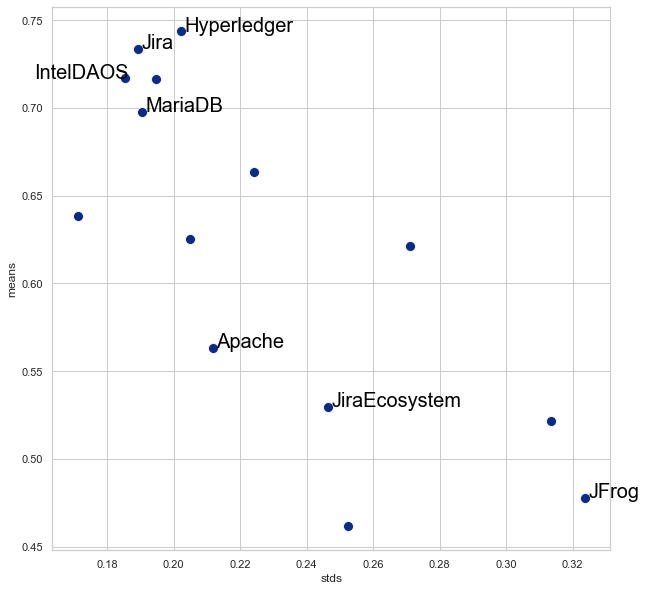

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

print("Starting Notebook.")

sns.set(font_scale = 1)
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x='stds', # Horizontal axis
       y='means', # Vertical axis
       data=stat_df, # Data source
#        size = 'num_predlts',
#         sizes=(200, 2000),
        s=100,
                     color='#0c2c84',
       legend=False)  

for line in range(0,stat_df.shape[0]):
    if line != 2:
        p1.text(stat_df.stds[line]+0.001, stat_df.means[line], 
        repo_dict[stat_df.repos[line]], horizontalalignment='left', 
        size=20, color='black')
    else:
        p1.text(stat_df.stds[line]+0.001, stat_df.means[line], 
        repo_dict[stat_df.repos[line]], horizontalalignment='right', 
        size=20, color='black')

# plt.title('Performance per Repository')
plt.xticks(size=20)
plt.xlim(0.125, 0.35)
plt.yticks(size=20)
plt.ylim(0.45, 0.9)
# Set x-axis label
# plt.xlabel('Accuracy')
plt.xlabel('Standard Deviation across F1-scores of Link Types', size=20)
# Set y-axis label
plt.ylabel('Macro F1-Score', size=25)

fig.savefig('pics/Repo_Performance.png')

## Performance Results Table 3

In [65]:
pred_types = set()

for s in REPOS:
    filename = 'data/processed/links_plus_'+s.lower()+'.csv'
    links = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col=0, sep=';')
    links['mappedtype'] = links['linktype'].map(fine_linktype_map)

    linktypes = (links.mappedtype.value_counts()>=len(links)*0.01).rename_axis('mappedtype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['mappedtype'])
    pred_types = pred_types.union(valid_types)
    

In [66]:
pred_lts = set()

for s in REPOS:
    class_rep_df = class_rep_d[s]
    for i in class_rep_df.index:
        pred_lts.add(i)

count_d = {}
  
# iterating through the elements of list
for i in list(pred_lts):
    count_d[i] = 0

for lt in pred_lts:
    for s in REPOS:
        class_rep_df  = class_rep_d[s]
        if lt in class_rep_df.index:
            count_d[lt] += 1

common_lt = []            
for d in count_d:
    if count_d[d]>3 and d not in ['accuracy', 'macro avg', 'weighted avg']:
        common_lt.append(d)

In [67]:
lt_performance_dict = {}

for lt in common_lt:
    lf_dt = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo'])
#     for s in ['hyperledger', 'inteldaos', 'jfrog', 'jira', 
#            'jiraecosystem', 'mariadb', 'mongodb', 
#            'qt', 'redhat', 'sakai', 'secondlife', 'sonatype', 'spring', 'apache']:
    for s in repos:
        class_rep_df = class_rep_d[s]
        if lt in class_rep_df.index:
            lf_dt.loc[len(lf_dt)] = [lt] + class_rep_df.loc[lt].values.tolist() + [s]
    lt_performance_dict[lt] = lf_dt

In [69]:
lts = []
pre_means = []
pre_stds = []
rec_means = []
rec_stds = []
f1_means = []
f1_stds = []

fb_means = []
fb_stds = []

for lt in common_lt:
    lt_df = lt_performance_dict[lt]
    pre_means.append(np.mean(lt_df['Precision']))
    pre_stds.append(np.std(lt_df['Precision']))
    rec_means.append(np.mean(lt_df['Recall']))
    rec_stds.append(np.std(lt_df['Recall']))
    f1_means.append(np.mean(lt_df['F1']))
    f1_stds.append(np.std(lt_df['F1']))
    fb_means.append(np.mean(lt_df['FBeta']))
    fb_stds.append(np.std(lt_df['FBeta']))
    lts.append(lt)

lt_stat_dict = {
            'lts': lts,
            'pre_means': pre_means,
            'pre_stds' : pre_stds,
            'rec_means': rec_means,
            'rec_stds': rec_stds,
            'f1_means' : f1_means,
            'f1_stds': f1_stds,
            'fb_means' : fb_means,
            'fb_stds': fb_stds,
          }

lt_stat_df = pd.DataFrame(lt_stat_dict)

### Results from LinkType_Properties

In [70]:
lt_stat_df

,lts,pre_means,pre_stds,rec_means,rec_stds,f1_means,f1_stds,fb_means,fb_stds
0,Epic,0.963004,0.014592,0.981985,0.010927,0.972319,0.009316,0.981024,0.010440
1,Relate,0.659503,0.088791,0.726818,0.069062,0.690377,0.076898,0.719571,0.066998
2,Cause,0.445878,0.100007,0.329909,0.063823,0.375415,0.069814,0.329983,0.063900
3,Depend,0.508547,0.150336,0.458034,0.161718,0.478885,0.154029,0.458289,0.162006
4,Duplicate,0.539449,0.163444,0.439522,0.180370,0.480165,0.170111,0.440037,0.179126
5,Clone,0.692946,0.179347,0.653782,0.128570,0.669017,0.144382,0.653810,0.128584
6,Incorporate,0.495898,0.305506,0.396223,0.270090,0.436438,0.283140,0.396366,0.270182
7,Block,0.612745,0.090917,0.567274,0.108992,0.587803,0.097262,0.567119,0.108298
8,Non-Link,0.783281,0.084865,0.735403,0.130076,0.756107,0.108425,0.735686,0.129952
9,Subtask,0.876219,0.051068,0.896864,0.036308,0.885796,0.038535,0.895797,0.036172


Text(0, 0.5, 'Macro F1-Score')

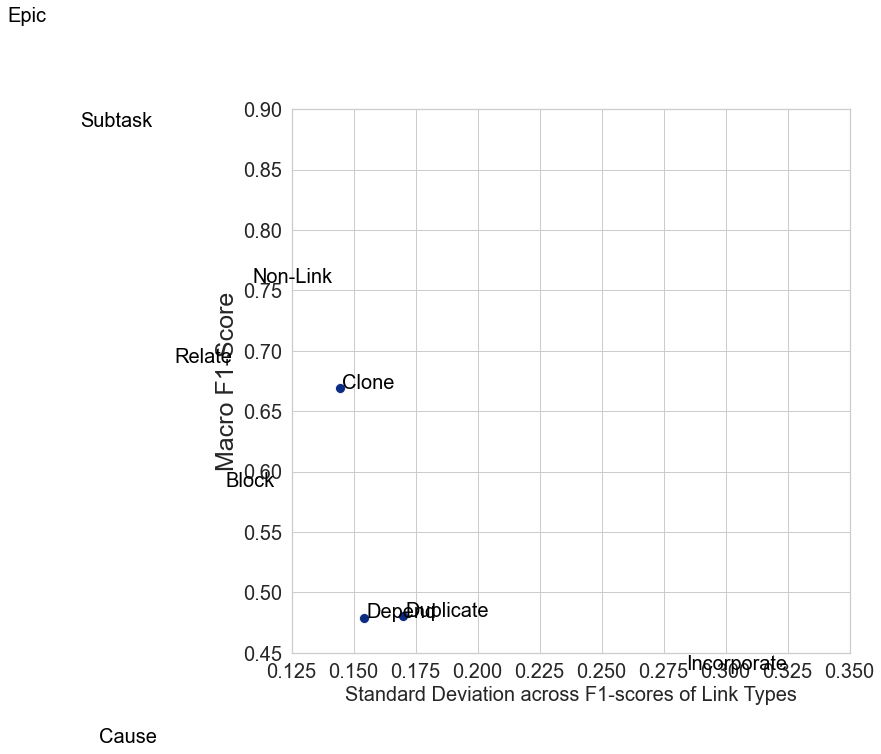

In [71]:
fig = plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x='f1_stds', # Horizontal axis
       y='f1_means', # Vertical axis
       data=lt_stat_df, # Data source
#        size = 'num_predlts',
#         sizes=(200, 2000),
        s=100,
                     color='#0c2c84',
       legend=False)  

for line in range(0,lt_stat_df.shape[0]):
    if line != 2:
        p1.text(lt_stat_df.f1_stds[line]+0.001, lt_stat_df.f1_means[line], 
        lt_stat_df.lts[line], horizontalalignment='left', 
        size=20, color='black')
    else:
        p1.text(lt_stat_df.f1_stds[line]+0.001, lt_stat_df.f1_means[line], 
        lt_stat_df.lts[line], horizontalalignment='right', 
        size=20, color='black')

# plt.title('Performance per Repository')
plt.xticks(size=20)
plt.xlim(0.125, 0.35)
plt.yticks(size=20)
plt.ylim(0.45, 0.9)
# Set x-axis label
# plt.xlabel('Accuracy')
plt.xlabel('Standard Deviation across F1-scores of Link Types', size=20)
# Set y-axis label
plt.ylabel('Macro F1-Score', size=25)

In [72]:
# Results from Link Type Properties
textdiff_df = pd.read_csv('data/text_diff.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
textlen_df = pd.read_csv('data/text_lengths.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
cossim_df = pd.read_csv('data/cosine_similarities.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
diff_d = textdiff_df.mean().to_dict()
len_d = textlen_df.mean().to_dict()
cossim_d = cossim_df.mean().to_dict()

In [73]:
# Share from Repository Properties
freq_df = pd.read_csv('data/repo_frequencies.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
share_d = freq_df.drop(columns=['Coverage', 'Bonfire Testing', 'Split']).loc['Mean'].to_dict()

In [74]:
lt_stat_df['counts'] = lt_stat_df['lts'].map(count_d)

In [75]:
lt_stat_df['diffs'] = lt_stat_df['lts'].map(diff_d)
lt_stat_df['lens'] = lt_stat_df['lts'].map(len_d)
lt_stat_df['cossim'] = lt_stat_df['lts'].map(cossim_d)
lt_stat_df['share'] = lt_stat_df['lts'].map(share_d)

In [76]:
lt_stat_df

,lts,pre_means,pre_stds,rec_means,rec_stds,f1_means,f1_stds,fb_means,fb_stds,counts,diffs,lens,cossim,share
0,Epic,0.963004,0.014592,0.981985,0.010927,0.972319,0.009316,0.981024,0.010440,7,38.375000,79.625000,0.050000,14.517931
1,Relate,0.659503,0.088791,0.726818,0.069062,0.690377,0.076898,0.719571,0.066998,15,54.466667,187.400000,0.282000,34.814910
2,Cause,0.445878,0.100007,0.329909,0.063823,0.375415,0.069814,0.329983,0.063900,7,75.142857,215.428571,0.185714,3.204718
3,Depend,0.508547,0.150336,0.458034,0.161718,0.478885,0.154029,0.458289,0.162006,9,36.700000,113.300000,0.199000,8.592757
4,Duplicate,0.539449,0.163444,0.439522,0.180370,0.480165,0.170111,0.440037,0.179126,14,56.642857,195.714286,0.349286,18.449904
5,Clone,0.692946,0.179347,0.653782,0.128570,0.669017,0.144382,0.653810,0.128584,8,9.153846,131.538462,0.826923,4.006623
6,Incorporate,0.495898,0.305506,0.396223,0.270090,0.436438,0.283140,0.396366,0.270182,8,54.375000,137.500000,0.148750,4.430296
7,Block,0.612745,0.090917,0.567274,0.108992,0.587803,0.097262,0.567119,0.108298,6,65.500000,176.400000,0.170000,7.040437
8,Non-Link,0.783281,0.084865,0.735403,0.130076,0.756107,0.108425,0.735686,0.129952,15,55.466667,139.266667,0.008000,NaN
9,Subtask,0.876219,0.051068,0.896864,0.036308,0.885796,0.038535,0.895797,0.036172,14,26.500000,68.571429,0.090714,20.891880


In [77]:
for j in ['counts', 'diffs', 'lens', 'cossim']:
    print(j)
    r = stats.pearsonr(lt_stat_df['f1_means'], lt_stat_df[j])
    print(np.round(r,4))
    
# does not include non-links
print('share')
temp = lt_stat_df.drop(index=2)
print(temp)
r = stats.pearsonr(lt_stat_df['f1_means'], lt_stat_df[j])
print(np.round(r,4))

counts
[0.2587 0.4704]
diffs
[-0.4999  0.1412]
lens
[-0.6994  0.0244]
cossim
[-0.1989  0.5817]
share
           lts  pre_means  pre_stds  rec_means  rec_stds  f1_means   f1_stds  \
0         Epic   0.963004  0.014592   0.981985  0.010927  0.972319  0.009316   
1       Relate   0.659503  0.088791   0.726818  0.069062  0.690377  0.076898   
3       Depend   0.508547  0.150336   0.458034  0.161718  0.478885  0.154029   
4    Duplicate   0.539449  0.163444   0.439522  0.180370  0.480165  0.170111   
5        Clone   0.692946  0.179347   0.653782  0.128570  0.669017  0.144382   
6  Incorporate   0.495898  0.305506   0.396223  0.270090  0.436438  0.283140   
7        Block   0.612745  0.090917   0.567274  0.108992  0.587803  0.097262   
8     Non-Link   0.783281  0.084865   0.735403  0.130076  0.756107  0.108425   
9      Subtask   0.876219  0.051068   0.896864  0.036308  0.885796  0.038535   

   fb_means   fb_stds  counts      diffs        lens    cossim      share  
0  0.981024  0.010440 

In [78]:
lt_stat_df.sort_values(by='counts', ascending = False)[['lts','f1_means', 'f1_stds']].mean()

<ipython-input-78-e8432d702de2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lt_stat_df.sort_values(by='counts', ascending = False)[['lts','f1_means', 'f1_stds']].mean()


f1_means    0.633232
f1_stds     0.115191
dtype: float64

In [79]:
lt_ov = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'Repo'])
for lt in lt_performance_dict:
    lt_ov = pd.concat([lt_ov, lt_performance_dict[lt]])

In [80]:
lt_ov.reset_index(inplace=True)

In [81]:
lt_ov.drop(columns=['index'], inplace = True)

In [82]:
lt_ov['part'] = 0

for s in REPOS:
    temp_df = lt_ov[lt_ov['Repo'] == s]
#     print(temp_df)
    total_supp = np.sum(temp_df['Support'])
#     print(s)
    for i in temp_df.index:
#         print(i)
#         print(temp_df.loc[i])
        avg = temp_df.loc[i]['Support']/total_supp
#         print(avg)
        lt_ov['part'].loc[i] = avg

<ipython-input-82-1f5c4a255015>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_ov['part'].loc[i] = avg


[(0.0, 1.0)]

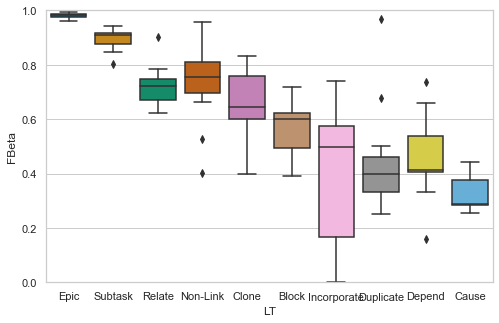

In [86]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="FBeta", data=lt_ov, order=['Epic', 'Subtask', 'Relate',
                                                  'Non-Link', 'Clone', 'Block',
                                                  'Incorporate', 'Duplicate','Depend',
                                                  'Cause'],
               palette='colorblind')
g.set(ylim=(0, 1))

# fig.savefig('pics/LT_f1.png')

[(0.0, 1.0)]

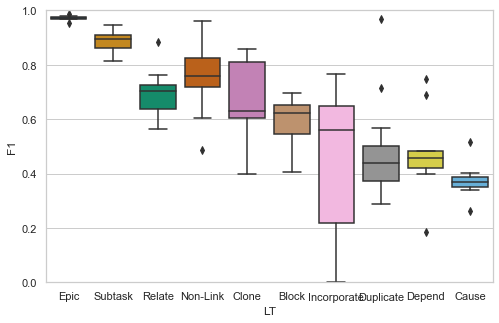

In [87]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="F1", data=lt_ov, order=['Epic', 'Subtask', 'Relate',
                                                  'Non-Link', 'Clone', 'Block',
                                                  'Incorporate', 'Duplicate','Depend',
                                                  'Cause'],
               palette='colorblind')
g.set(ylim=(0, 1))

# fig.savefig('pics/LT_f1.png')

[(0.0, 0.7)]

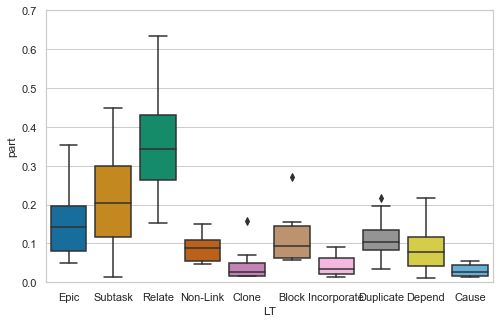

In [120]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="part", data=lt_ov, order=['Epic', 'Subtask', 'Relate',
                                                  'Non-Link', 'Clone', 'Block',
                                                  'Incorporate', 'Duplicate','Depend',
                                                  'Cause'],
               palette='colorblind')
g.set(ylim=(0, 0.7))

# fig.savefig('pics/LT_Share.png')

In [88]:
lt_corr_df = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo'])
for lt in common_lt:
    for s in ['hyperledger', 'inteldaos', 'jfrog', 'jira', 
           'jiraecosystem', 'mariadb', 'mongodb', 
           'qt', 'redhat', 'sakai', 'secondlife', 'sonatype', 'spring', 'apache']:
        class_rep_df = class_rep_d[s]
        if lt in class_rep_df.index:
            lt_corr_df.loc[len(lt_corr_df)] = [lt] + class_rep_df.loc[lt].values.tolist() + [s]

In [89]:
lt_corr_df['part'] = 0

for s in ['hyperledger', 'inteldaos', 'jfrog', 'jira', 
           'jiraecosystem', 'mariadb', 'mongodb', 
           'qt', 'redhat', 'sakai', 'secondlife', 'sonatype', 'spring', 'apache']:
    temp_df = lt_corr_df[lt_corr_df['Repo'] == s]
#     print(temp_df)
    total_supp = np.sum(temp_df['Support'])
#     print(s)
    for i in temp_df.index:
#         print(i)
#         print(temp_df.loc[i])
        avg = temp_df.loc[i]['Support']/total_supp
#         print(avg)
        lt_corr_df['part'].loc[i] = avg

<ipython-input-89-6f051df13a23>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_corr_df['part'].loc[i] = avg


In [90]:
textdiff_df = pd.read_csv('data/text_diff.csv', encoding="UTF-8", low_memory=False, sep=",")
textlen_df = pd.read_csv('data/text_lengths.csv', encoding="UTF-8", low_memory=False, sep=",")
cossim_df = pd.read_csv('data/cosine_similarities.csv', encoding="UTF-8", low_memory=False, sep=",")

In [91]:
textdiff_df = textdiff_df.melt('Repo', var_name='LT', value_name='diff')
textdiff_df['Repo'] = textdiff_df['Repo'].apply(lambda x: x.lower())
textlen_df = textlen_df.melt('Repo', var_name='LT', value_name='len')
textlen_df['Repo'] = textlen_df['Repo'].apply(lambda x: x.lower())
cossim_df = cossim_df.melt('Repo', var_name='LT', value_name='cossim')
cossim_df['Repo'] = cossim_df['Repo'].apply(lambda x: x.lower())

In [92]:
lt_corr_df = lt_corr_df.merge(textdiff_df, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
lt_corr_df = lt_corr_df.merge(textlen_df, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
lt_corr_df = lt_corr_df.merge(cossim_df, how='inner', left_on=['Repo', 'LT'], right_on=['Repo', 'LT'])
lt_corr_df.columns

Index(['LT', 'Precision', 'Recall', 'F1', 'Support', 'FBeta', 'Repo', 'part',
       'diff', 'len', 'cossim'],
      dtype='object')

In [93]:
for lt in common_lt:
    temp_df = lt_corr_df[lt_corr_df['LT']==lt]
    print(lt)
    for j in ['Support', 'part', 'len', 'diff', 'cossim']:
        r = stats.pearsonr(temp_df['F1'], temp_df[j])
#         if r[1]<0.05:
        print(j)
        print(np.round(r,4))
    print('-------------')

Epic
Support
[-0.3888  0.3887]
part
[-0.0856  0.8553]
len
[-0.7852  0.0364]
diff
[-0.7344  0.0602]
cossim
[-0.1673  0.7199]
-------------
Relate
Support
[0.3086 0.2831]
part
[0.7561 0.0018]
len
[0.3514 0.2179]
diff
[-0.0165  0.9553]
cossim
[0.5779 0.0304]
-------------
Cause
Support
[0.0821 0.8612]
part
[0.1525 0.744 ]
len
[0.7447 0.0548]
diff
[0.7617 0.0466]
cossim
[-0.2032  0.6622]
-------------
Depend
Support
[0.5938 0.0918]
part
[0.8938 0.0012]
len
[-0.0631  0.8718]
diff
[0.2407 0.5328]
cossim
[0.1122 0.7738]
-------------
Duplicate
Support
[0.5531 0.0499]
part
[8.765e-01 1.000e-04]
len
[-0.1507  0.6231]
diff
[-0.1547  0.6139]
cossim
[0.3253 0.278 ]
-------------
Clone
Support
[0.39   0.3396]
part
[0.1561 0.7121]
len
[-0.2878  0.4895]
diff
[-0.8466  0.008 ]
cossim
[0.8451 0.0082]
-------------
Incorporate
Support
[0.5787 0.1328]
part
[0.7795 0.0226]
len
[-4.000e-04  9.992e-01]
diff
[-0.0744  0.861 ]
cossim
[0.0269 0.9495]
-------------
Block
Support
[-0.0333  0.95  ]
part
[0.7133 0

In [96]:
import itertools
x = ['Epic', 'Subtask', 'Relate', 'Clone', 'Block', 'Incorporate', 'Duplicate','Depend', 'Cause']
y = list(itertools.combinations(x, 2))
print(len(y))

for (lt1, lt2) in y:
    count = 0
    lt1_f1 = []
    lt2_f1 = []
    temp_df1 = lt_corr_df[lt_corr_df['LT'].isin([lt1, lt2])]
    for r in ['hyperledger', 'inteldaos', 'jfrog', 'jira', 
           'jiraecosystem', 'mariadb', 'mongodb', 
           'qt', 'redhat', 'sakai', 'secondlife', 'sonatype', 'spring', 'apache', 'mojang']:
        temp_df2 = temp_df1[temp_df1['Repo']==r]
        if (len(temp_df2) == 2):
            lt1_f1.append(temp_df2[temp_df2['LT']==lt1]['F1'].iloc[0])
            lt2_f1.append(temp_df2[temp_df2['LT']==lt2]['F1'].iloc[0])
            count+=1
#     print(lt1_f1)
#     print(lt2_f1)
    r = stats.pearsonr(lt1_f1, lt2_f1)
    if r[1]<0.05:
            print(lt1 + " and " + lt2)
            print(count)
            print(np.round(r,4))
            print('------------')
    

36
Epic and Subtask
7
[-0.8079  0.0279]
------------
Clone and Block
5
[0.9417 0.0167]
------------
Clone and Incorporate
6
[0.9033 0.0136]
------------
Block and Incorporate
4
[0.9524 0.0476]
------------


## F1 scores per repository per link type, Table 2

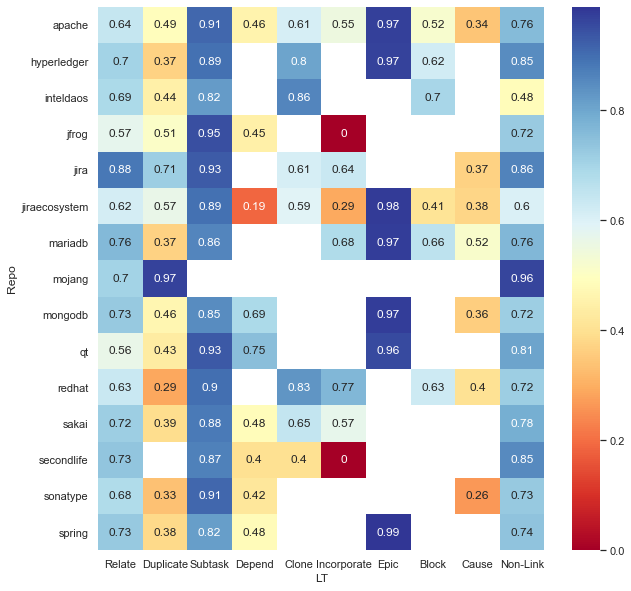

In [97]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='F1', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

fig = plt.figure(figsize=(10,10))
sns.heatmap(repo_lt_performance_df, cmap="RdYlBu", annot=True)

fig.savefig('pics/Repo_F1.png')

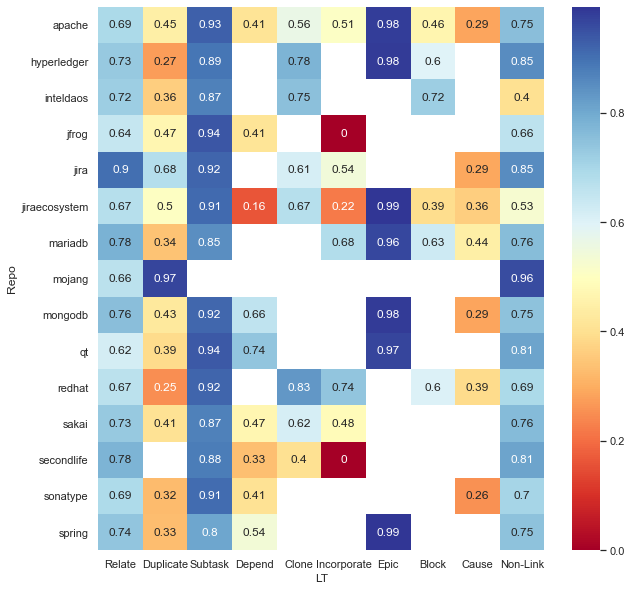

In [98]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='FBeta', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

fig = plt.figure(figsize=(10,10))
sns.heatmap(repo_lt_performance_df, cmap="RdYlBu", annot=True)

fig.savefig('pics/Repo_FBeta.png')

In [99]:
repo_lt_performance_df

LT,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link
Repo,,,,,,,,,,
apache,0.693008,0.445744,0.925874,0.409390,0.564838,0.508504,0.980757,0.462579,0.285037,0.754001
hyperledger,0.731447,0.273605,0.890460,NaN,0.778981,NaN,0.983733,0.595031,NaN,0.852763
inteldaos,0.720896,0.361360,0.871375,NaN,0.750044,NaN,NaN,0.718626,NaN,0.400825
jfrog,0.644444,0.468047,0.941531,0.412093,NaN,0.000000,NaN,NaN,NaN,0.661791
jira,0.900916,0.677343,0.917186,NaN,0.614307,0.540908,NaN,NaN,0.288554,0.852577
jiraecosystem,0.673959,0.502367,0.910863,0.160005,0.674942,0.219545,0.992727,0.392683,0.363670,0.526619
mariadb,0.783117,0.338572,0.848388,NaN,NaN,0.679669,0.962837,0.629655,0.442873,0.757007
mojang,0.664086,0.967741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956763
mongodb,0.756128,0.426042,0.915704,0.657895,NaN,NaN,0.983297,NaN,0.285745,0.748264


In [100]:
repo_lt_perf_f1_df = repo_lt_performance_df.merge(stat_df[['repos', 'means', 'w_means']], left_on='Repo', right_on='repos')
repo_lt_perf_f1_df.set_index('repos', inplace=True)
means = np.mean(repo_lt_perf_f1_df)
std = np.std(repo_lt_perf_f1_df)
repo_lt_perf_f1_df.loc['Mean'] = means
repo_lt_perf_f1_df.loc['Standard Dev.'] = std

round(repo_lt_perf_f1_df, 3)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link,means,w_means
repos,,,,,,,,,,,,
apache,0.693,0.446,0.926,0.409,0.565,0.509,0.981,0.463,0.285,0.754,0.563,0.699
hyperledger,0.731,0.274,0.890,NaN,0.779,NaN,0.984,0.595,NaN,0.853,0.744,0.845
inteldaos,0.721,0.361,0.871,NaN,0.750,NaN,NaN,0.719,NaN,0.401,0.717,0.675
jfrog,0.644,0.468,0.942,0.412,NaN,0.000,NaN,NaN,NaN,0.662,0.478,0.657
jira,0.901,0.677,0.917,NaN,0.614,0.541,NaN,NaN,0.289,0.853,0.734,0.824
jiraecosystem,0.674,0.502,0.911,0.160,0.675,0.220,0.993,0.393,0.364,0.527,0.530,0.712
mariadb,0.783,0.339,0.848,NaN,NaN,0.680,0.963,0.630,0.443,0.757,0.698,0.716
mongodb,0.756,0.426,0.916,0.658,NaN,NaN,0.983,NaN,0.286,0.748,0.716,0.721
qt,0.621,0.392,0.936,0.738,NaN,NaN,0.970,NaN,NaN,0.809,0.663,0.713


#### Latex Code with Color labels for Table 2

In [203]:
table_2_df = round(repo_lt_perf_f1_df, 2)

print(table_2_df.to_latex())

\begin{tabular}{lllllllllllll}
\toprule
{} &         Relate &      Duplicate &        Subtask &        Depend &          Clone &  Incorporate &           Epic &        Block &         Cause &       Non-Link &          means &        w\_means \\
repos         &                &                &                &               &                &              &                &              &               &                &                &                \\
\midrule
apache        &      good 0.64 &        ok 0.49 &  verygood 0.91 &       ok 0.46 &      good 0.61 &      ok 0.55 &  verygood 0.97 &      ok 0.52 &      bad 0.34 &      good 0.76 &        ok 0.56 &       good 0.7 \\
hyperledger   &       good 0.7 &       bad 0.37 &  verygood 0.89 &           nan &   verygood 0.8 &          nan &  verygood 0.97 &    good 0.62 &           nan &  verygood 0.85 &      good 0.74 &  verygood 0.85 \\
inteldaos     &      good 0.69 &        ok 0.44 &  verygood 0.82 &           nan &  verygood 0.86 &  

<ipython-input-203-3f36ab9f389a>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_2_df.to_latex())


### Precision

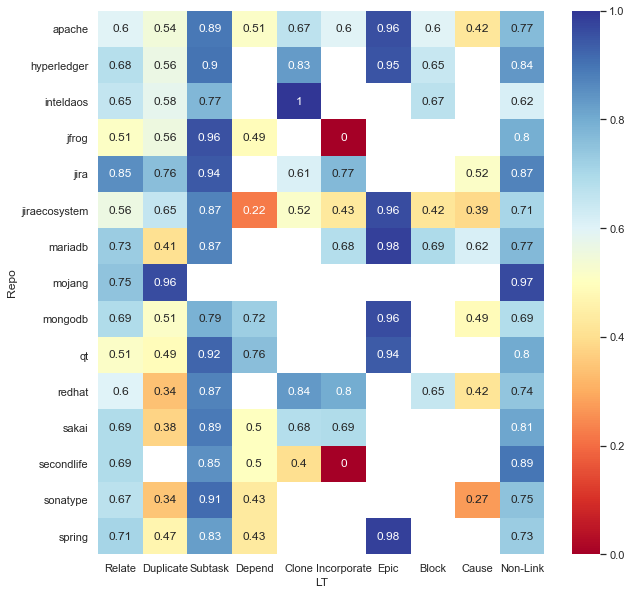

In [81]:
repo_lt_pre_df = pd.pivot_table(lt_ov, values='Precision', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

fig = plt.figure(figsize=(10,10))
sns.heatmap(repo_lt_pre_df, cmap="RdYlBu", annot=True)

fig.savefig('pics/Repo_Precision.png')

In [82]:
repo_lt_pre_df

LT,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link
Repo,,,,,,,,,,
apache,0.595346,0.544489,0.891317,0.514847,0.667579,0.595398,0.958952,0.595163,0.423445,0.766171
hyperledger,0.678218,0.564516,0.899888,NaN,0.831461,NaN,0.950112,0.645161,NaN,0.838554
inteldaos,0.654867,0.580645,0.774194,NaN,1.000000,NaN,NaN,0.671329,NaN,0.615385
jfrog,0.508772,0.555556,0.956332,0.488372,NaN,0.000000,NaN,NaN,NaN,0.795918
jira,0.854453,0.759346,0.941909,NaN,0.610052,0.772595,NaN,NaN,0.515000,0.873294
jiraecosystem,0.560440,0.654135,0.872385,0.222222,0.519231,0.428571,0.964664,0.420635,0.390244,0.705882
mariadb,0.726996,0.406114,0.872832,NaN,NaN,0.682609,0.983696,0.692754,0.616000,0.771588
mojang,0.748893,0.960966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966253
mongodb,0.691351,0.513361,0.787440,0.722706,NaN,NaN,0.961501,NaN,0.488189,0.685684


### Recall

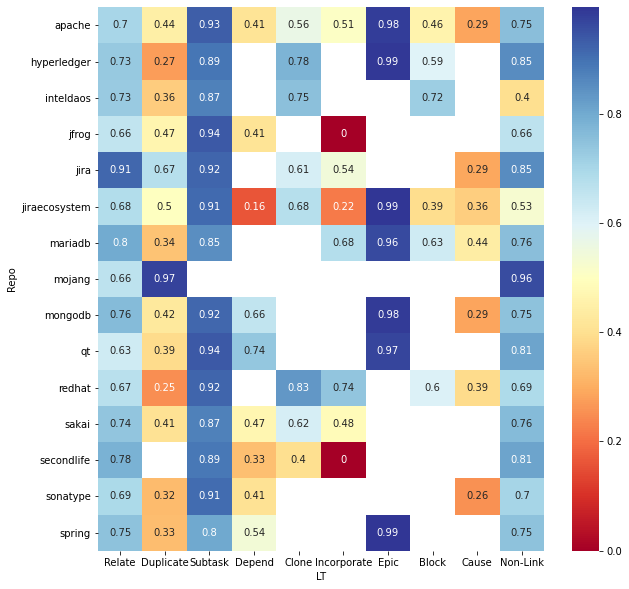

In [205]:
repo_lt_rec_df = pd.pivot_table(lt_ov, values='Recall', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

fig = plt.figure(figsize=(10,10))
sns.heatmap(repo_lt_rec_df, cmap="RdYlBu", annot=True)

fig.savefig('pics/Repo_Recall.png')